<a href="https://colab.research.google.com/github/Kasfim/CSE432/blob/main/cats_vs_dogs_classification(ID_2215151110).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐱🐶 Cats vs Dogs Classification

In [ ]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
(train_ds, test_ds), ds_info = tfds.load('cats_vs_dogs',
                                         split=['train[:80%]', 'train[80%:]'],
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.U0TN4T_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


# ✅ Data preprocessing

In [ ]:

def preprocess_img(image, label):
    image = tf.image.resize(image, (128, 128))
    return tf.cast(image, tf.float32) / 255.0, label


# ✅ Prefetch for performance

In [ ]:

train_ds = train_ds.map(preprocess_img).cache().shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_img).batch(64).prefetch(tf.data.AUTOTUNE)

# ✅ Visualize some data

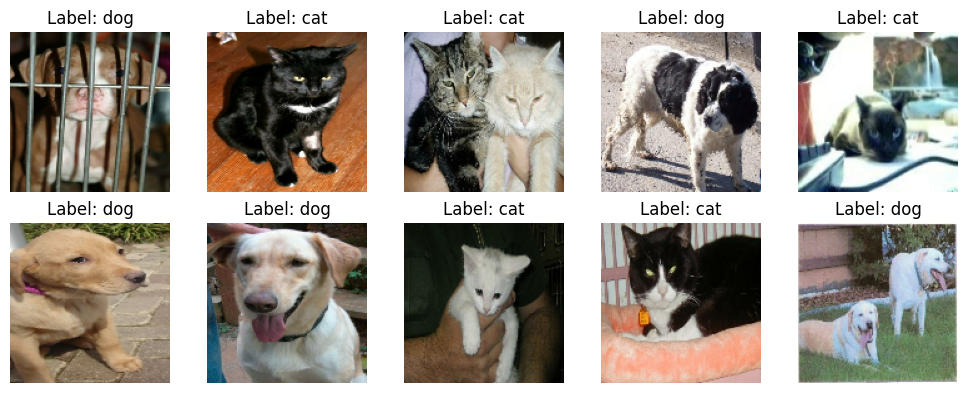

In [ ]:


class_names = ['cat', 'dog']

plt.figure(figsize=(10, 4))
for image, label in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(image[i])
        plt.title(f"Label: {class_names[label[i].numpy()]}")
        plt.axis("off")
plt.tight_layout()
plt.show()

##  Build the CNN Model


In [ ]:
##  Build the CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,267,713 (12.47 MB)

 Trainable params: 3,267,713 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ✅ Train the model
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.5694 - loss: 0.6961 - val_accuracy: 0.7291 - val_loss: 0.5429
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.7312 - loss: 0.5312 - val_accuracy: 0.7674 - val_loss: 0.4804
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.7766 - loss: 0.4575 - val_accuracy: 0.7855 - val_loss: 0.4578
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 569s 2s/step - accuracy: 0.8160 - loss: 0.3944 - val_accuracy: 0.7939 - val_loss: 0.4613
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.8713 - loss: 0.2985 - val_accuracy: 0.7984 - val_loss: 0.5117
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.9118 - loss: 0.2155 - val_accuracy: 0.7827 - val_loss: 0.6584
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.9423 - loss: 0.1419 - val_accuracy: 0.7990 - val_loss: 0.7607
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.9702 - loss: 0.0805 - val_accu

# ✅ Plot training results

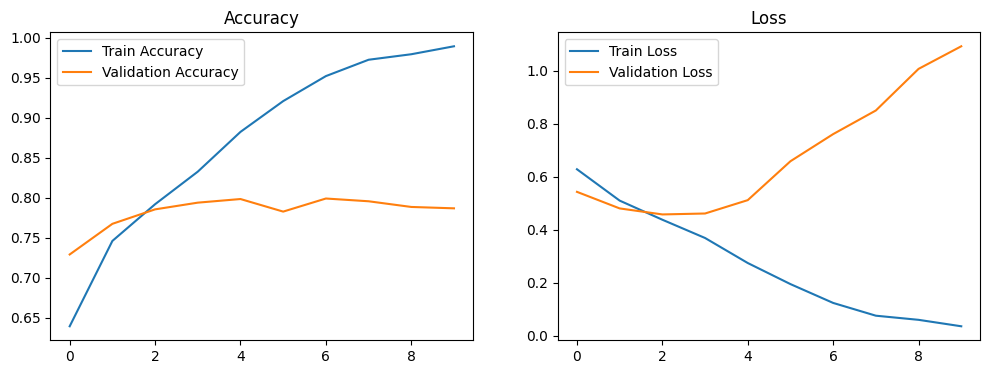

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Evaluate on test data

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_true = []
y_pred_probs = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(preds.flatten())

y_pred = (np.array(y_pred_probs) > 0.5).astype(int)

73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 536ms/step - accuracy: 0.7885 - loss: 1.1111
Test Accuracy: 0.7868
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step
2/2 ━

# Confusion Matrix and Classification Report

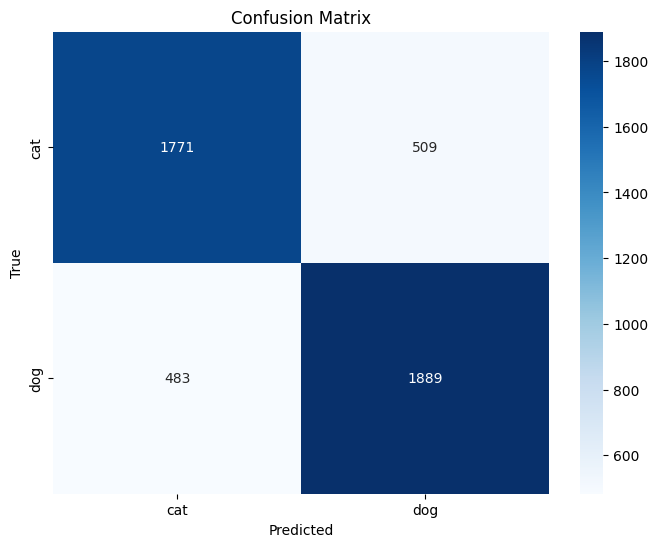

              precision    recall  f1-score   support

         cat       0.79      0.78      0.78      2280
         dog       0.79      0.80      0.79      2372

    accuracy                           0.79      4652
   macro avg       0.79      0.79      0.79      4652
weighted avg       0.79      0.79      0.79      4652



In [ ]:
ss
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

##  Display Sample Predictions


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


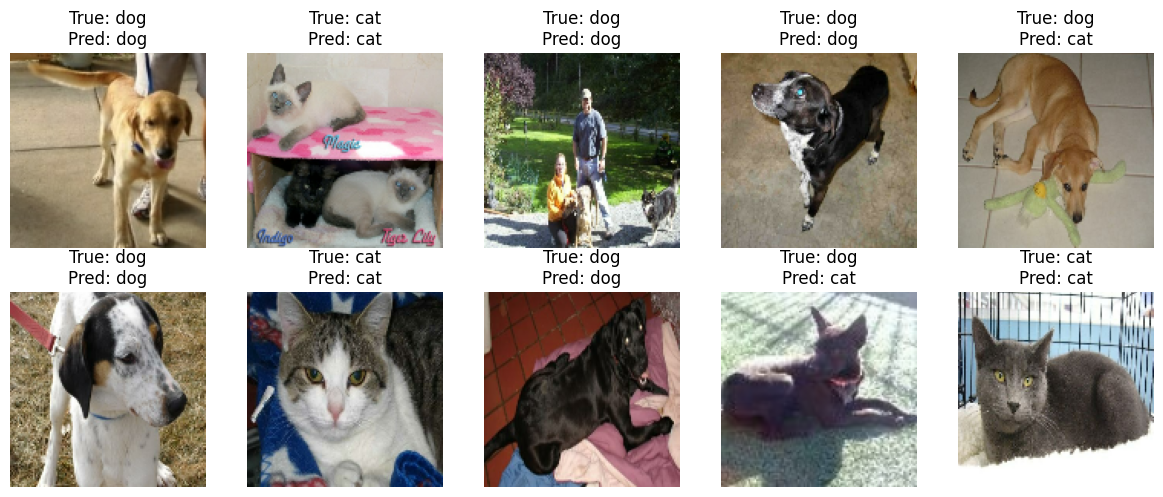

In [ ]:

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    pred_labels = (preds.flatten() > 0.5).astype(int)
    plt.figure(figsize=(12, 5))
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        true = class_names[labels[i].numpy()]
        pred = class_names[pred_labels[i]]
        plt.title(f'True: {true}\nPred: {pred}')
        plt.axis("off")
    plt.tight_layout()
    plt.show()